In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ephysvibe.trials.spikes import firing_rate
from ephysvibe.trials import align_trials
from ephysvibe.structures.neuron_data import NeuronData

### Load file

In [2]:
neu_path = "//envau_cifs.intlocal.univ-amu.fr/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/pfc/neurons/2022-11-22_10-59-03_Riesling_pfc_e1_r1_mua20_neu.h5"
neu_data = NeuronData.from_python_hdf5(neu_path)

In [3]:
# parameters
time_before=500
select_block=2
start=-200
end=1500
idx_start = time_before + start 
idx_end = time_before+end

### Select relevant trials

In [4]:
# Define target codes 
position_codes= {
    # code: [ML axis], [plot axis]
    '127': [[10,0],[1,2]],
    '126': [[7,7],[0,2]],
    '125': [[0,10],[0,1]],
    '124': [[-7,7],[0,0]],
    '123': [[-10,0],[1,0]],
    '122': [[-7,-7],[2,0]],
    '121': [[0,-10],[2,1]],
    '120': [[7,-7],[2,2]],
}

In [5]:
# select correct trials, block two, position, and align with target onset 
sp_target_on_all=[]
conv_all=[]
n_trials=[]
for code in position_codes.keys():
    sp_target_on,mask_in = align_trials.align_on(
        sp_samples=neu_data.sp_samples,
        code_samples=neu_data.code_samples,
        code_numbers=neu_data.code_numbers,
        trial_error=neu_data.trial_error,
        block=neu_data.block,
        pos_code=neu_data.pos_code,
        select_block= select_block,
        select_pos= int(code),
        event ="target_on",
        time_before = time_before,
        error_type= 0,
    )

    sp_target_on_all.append(sp_target_on[:,idx_start:idx_end])
    arr = sp_target_on.mean(axis=0)
    conv_all.append(firing_rate.convolve_signal(arr=arr,fs = 1000,w_size=0.1,w_std=0.015,axis=0)[idx_start:idx_end])
    n_trials.append(mask_in.sum())


### Select trials by target code

## Plot rasters for each neuron for each target

Text(0.5, 1.05, '2022-11-22_10-59-03: pfc mua 20 ')

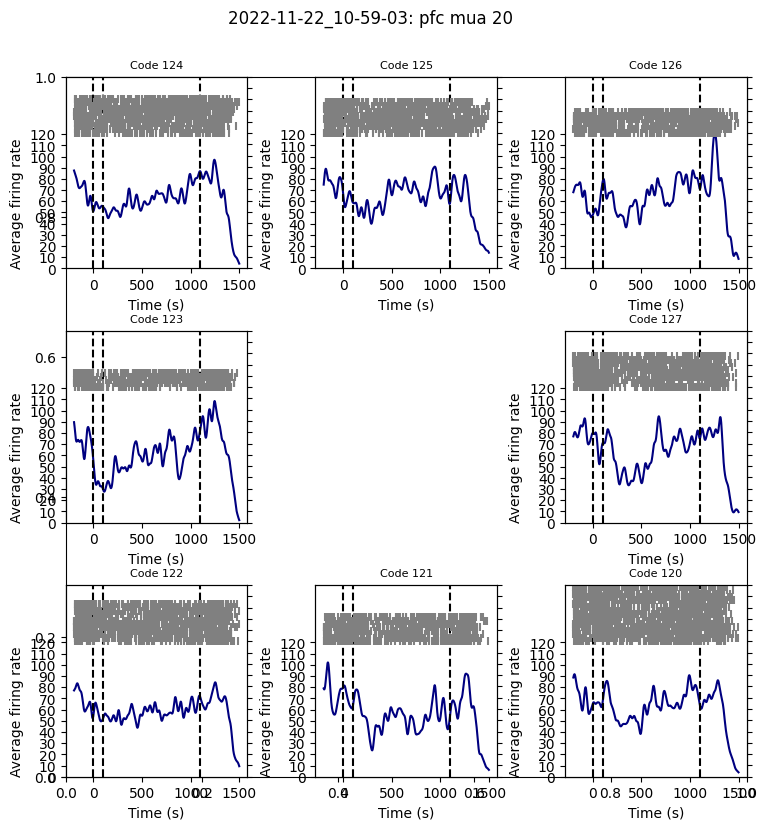

In [6]:
fig, _ = plt.subplots(figsize=(8, 8), sharex=True, sharey=True) 
conv_max = np.max(conv_all)
max_num_trials = max(n_trials)
for code,sp_target_on,conv in zip(position_codes.keys(),sp_target_on_all,conv_all):

    axis = position_codes[code][1]
    ax = plt.subplot2grid((3, 3), (axis[0], axis[1]))    
    time = np.arange(0,len(conv))+ start
    ax2 = ax.twinx()
    # ----- plot conv----------
    ax.plot(time, conv, color="navy")
    # ----- plot spikes----------
    rows, cols = np.where(sp_target_on >= 1)
    cols = cols +start
    rows = rows + rows * 2
    ax2.scatter(cols, rows, marker="|", alpha=1, color="grey")
    ax.set_title("Code %s" % (code), fontsize=8)
    
    ax.set_ylim(0, conv_max + max_num_trials * 3)
    ax.set_yticks(np.arange(0, conv_max, 10))
    ax2.set_ylim(-conv_max, max_num_trials)
    ax2.set_yticks(np.arange(-conv_max, max_num_trials * 3, 10))

    plt.setp(ax2.get_yticklabels(), visible=False)
    
    ax.set_ylabel(ylabel="Average firing rate",fontsize=10,loc="bottom")
    ax.set_xlabel(xlabel="Time (s)",fontsize=10)
    ax.vlines(
            [0,100,1100],
            0,
            conv_max + max_num_trials * 3,
            color="k",
            linestyles="dashed",
            )  

fig.tight_layout(pad=0.4, h_pad=0.2, w_pad=0.2)
fig.suptitle("%s: %s %s %d " % (neu_data.date_time, neu_data.area, neu_data.cluster_group, neu_data.cluster_number), x=0.5, y=1.05,fontsize=12)


<Figure size 640x480 with 0 Axes>